## Intermediate Data Science

#### University of Redlands - DATA 201
#### Author: Jesus Plascencia
#### 9/22/2025

In [57]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

### You Try - 2 Warm-Up Problems From Lecture

### You Try

See if you can recreate the plot below. The functions used are entered below.

![Rainbow Plot](rainbow.jpg)



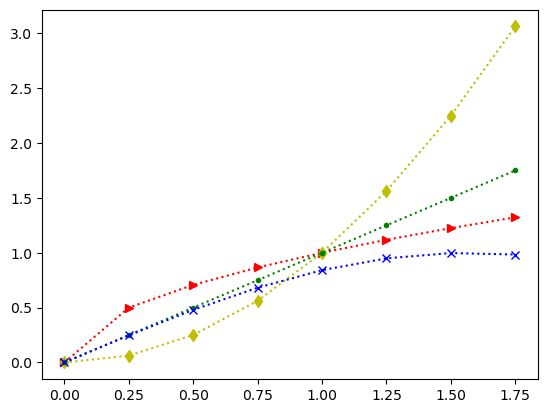

In [60]:
x = np.arange(0,2,.25)
y1 = np.sqrt(x) 
y2 = x**2
y3 = x
y4 = np.sin(x)

# Your code here
plt.plot(x,y1,'r:>')
plt.plot(x,y2, 'y:d')
plt.plot(x,y3, 'g:.')
plt.plot(x,y4, 'b:x')
plt.show()

----------------------------------

### You Try

Now using what you know about annotations and labels. See if you can recreate the plot with the data given below.

![Rainbow Plot Annotated](rainbow_annotate.jpg)

In [63]:
x = np.arange(0, 2, 0.25)
y1 = np.sqrt(x)
y2 = x**2
y3 = x

# Your code here

# Your code here

points = [(1,1), (0,0)]

for point in points:
    plt.annotate(label, xy=(x, spx.asof(y) + 75),
                xytext=(x, spx.asof(date) + 225),  
                 arrowprops=dict(facecolor="black", headwidth=4, width=1,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")
#How does it recognize my x and y points --> ask Bieri

               

NameError: name 'label' is not defined

---------------
## Visualization - Day6 HW

## Homework 6

Import the medical costs dataset:

https://www.kaggle.com/datasets/mirichoi0218/insurance

at this point you should be able to write code using what is provided on kagglehub and pandas to read in the data as a DataFrame. Remember one helpful command

    os.listdir(path)

to list the names of the files that you downloaded.

You job is to:

1.  Do basic EDA - value counts, nan counts, and statistics
2.  Try out a pairplot - comment on any trends, outliers, or interesting distributions.
3. Make a few plots of your own exploring the data. For example:

- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.

For part 3, your goal is to make multiple plots. You don't have to answer every question, but really try to practice all of the ideas from lecture. You must use each of the following at least once:

1. Plotly
2. Matlplotlib
3. Seaborn

(extra) Pandas

(extra) Bokeh
    
------------------------------------

Your final notebooks should:

- [ ] Be a completely new notebook with just the Day6 stuff in it: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

## Importing KaggleHub Dataset

In [66]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 7.70MB/s]

Extracting files...
Path to dataset files: /Users/jesusplascencia/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [138]:
path1 = '/Users/jesusplascencia/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1/'
file = path1+os.listdir(path)[0]
df = pd.read_csv(file)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 1] Do basic EDA - value counts, nan counts, and statistics

Using the .head(10) function to get a glimpse of the data set we see that we have 7 columns [age, sex, bmi, children, smoker, region, charges]. We also see that there is a booleon statement for smoker. To see how these columns are defined I used the .info() function and I found that sex, smoker, region were objects, age and children were integers, and bmi and charges were floats. I also found that tthese is 1338 entries.

None of the columns had .Na values. The .describe() function also gave us valuable information such as the mean, std, min and max. We used the value count function to see how many unique values repeated. 

In [84]:
# 1]
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#### 1] Get descriptive statistics from the dataframe 



In [90]:
#1]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [103]:
#1]
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [110]:
#1]
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [118]:
#1]
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [134]:
#1]
print(df.value_counts())

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64


## 2] Try out a pairplot - comment on any trends, outliers, or interesting distributions.

 The pairplot produced beautiful results that helps me visualize my data. We can see that age is fairly distributed between 20 and 60. There are no significant outliers but there is a fw who exceed the age of 60. BMI looks bell shape / normally distributed around 30s. There are some outliers for BMI that skew the data upward. For BMI, values above 60 seem to bring the emphasize the peak of the bell shaped curve. Children is very stacked at ages  = 1-5. Based off the children data their seems to be gaps so I question where the data for children was gathered, and if their was a major oversight (in the sense that it is not representing all of the different ages in children). When looking at charges, we can easily see that the data is right skewed. This means that most individuals have charges under 30,000 dollars and the vast majority have charges below 20,0000 dollars. Their is a very small group that has charges above $60,000 and another small group with charges above 45,000 dollars. This makes me believe that these outliers may also be older individuals who are more likely to incur medical expenses. 

**A couple of interesting things of note is the following:** The younger the person is the less likely they are to incur an expensive charge. The older a person is the more likely they will be paying a large expense. I also noticed that charges for children is a perfect horizontal line. This is very confusing and is something I'd like to get more insight on. Finally, it is worth noting that charges had the most glaring display of outliers from age, children, and bmi. This may be because charges are simply large denominations when compared to the other variables. 

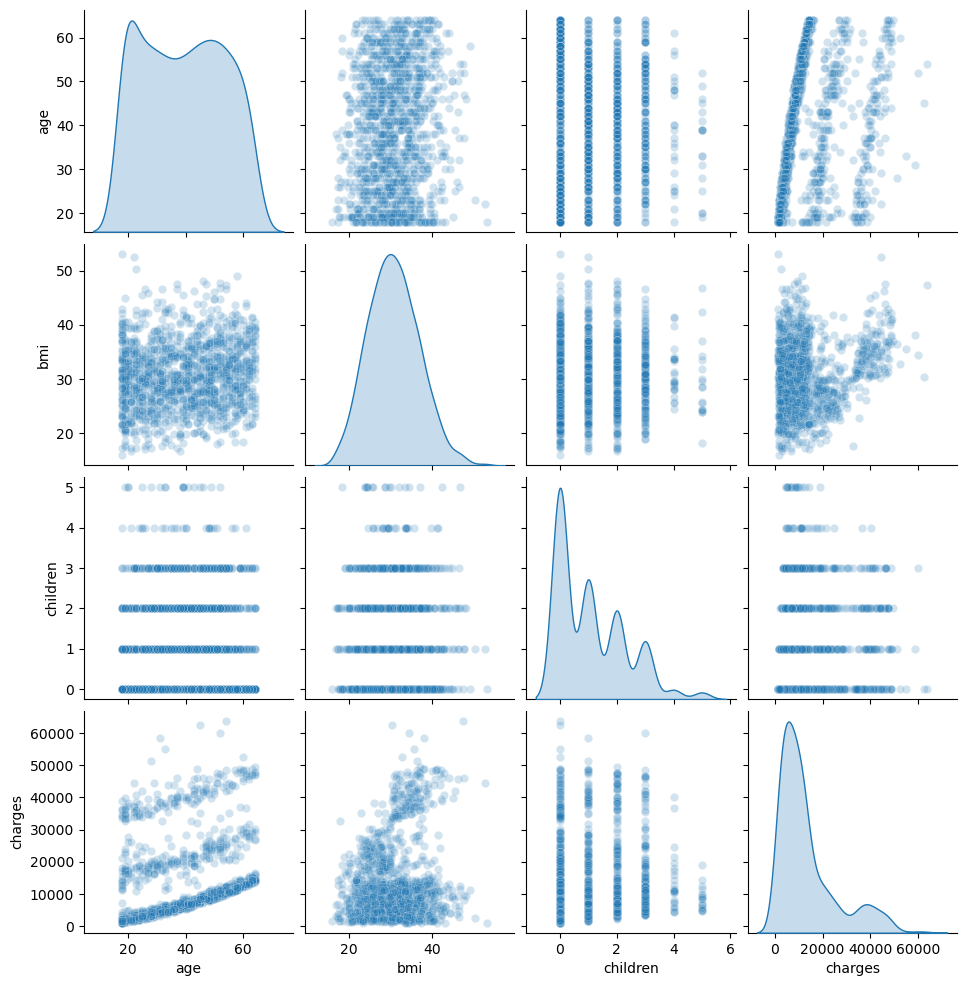

In [145]:
sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})
plt.show()

In [152]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 3. Make a few plots of your own exploring the data. For example:

- Age vs Charges - comment on what you see: correlation, groups, etc
- Age vs BMI - make a plot for men and women separately or smokers vs non-smokers.
- Visualization of who is charged more on average: men, women, smokers, non-smokers? 
- Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.
- Visualization of how the regions might affect your graphs above.

For part 3, your goal is to make multiple plots. You don't have to answer every question, but really try to practice all of the ideas from lecture. You must use each of the following at least once:

1. Plotly
2. Matlplotlib
3. Seaborn

(extra) Pandas

(extra) Bokeh
    

In [166]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [174]:
list(df.columns)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

### 1] Age Vs. Charges using Matplotlib

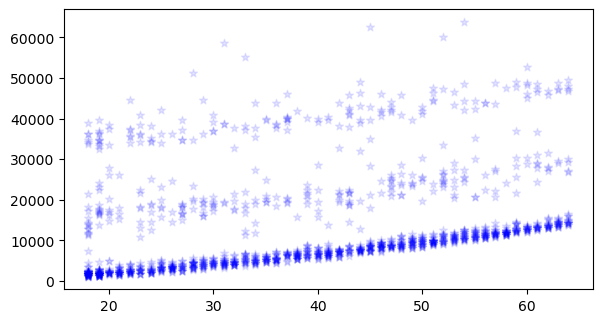

In [237]:
#Age Vs Charges
x = df['age'] 
y = df['charges']
fig = plt.figure(figsize = (15,8))
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(x,y,color='b',marker='*',alpha=.1)

### 2} Age vs BMI --> Using Seaborn

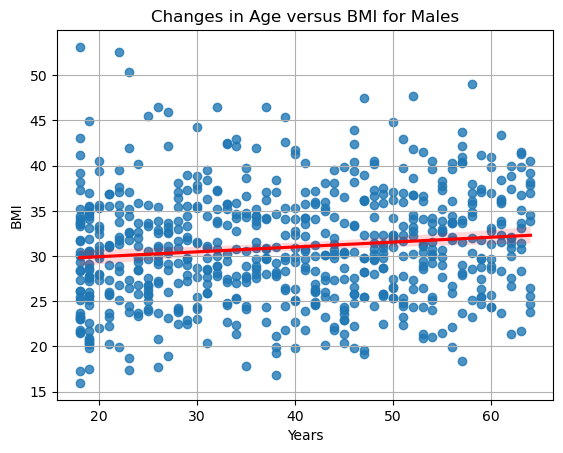

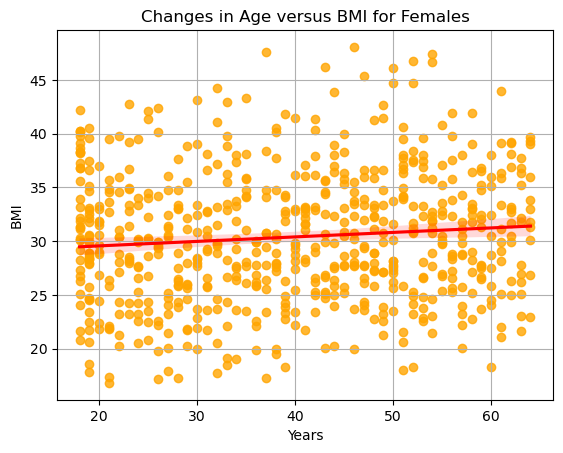

In [325]:
df['male_only'] = df['sex'] == 'male'
df_men = df[df['male_only']]

# Men Only 
ax = sns.regplot(x="age", y="bmi", data=df_men, line_kws={"color" : "red"})
ax.set_title("Changes in Age versus BMI for Males")
ax.grid()
ax.set_xlabel('Years')
ax.set_ylabel('BMI')
plt.show()

# Females Only
df['female_only'] = df['sex'] == 'female'
df_female = df[df['female_only']]

ax2 = sns.regplot(x="age", y="bmi", data=df_female, line_kws={"color" : "red"}, scatter_kws ={"color" : "orange"} )
ax2.set_title("Changes in Age versus BMI for Females")
ax2.grid()
ax2.set_xlabel('Years')
ax2.set_ylabel('BMI')

plt.show()

# Women only

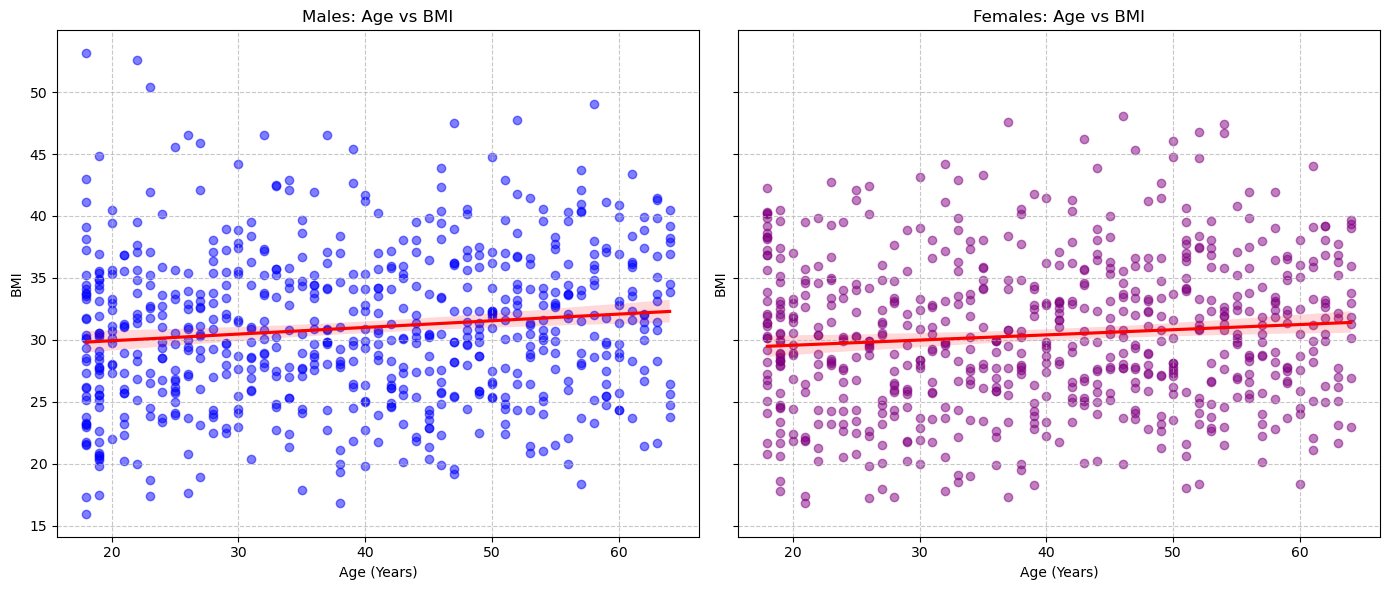

In [261]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Males
sns.regplot(
    x="age", y="bmi", data=df[df['sex'] == 'male'],
    scatter_kws={'alpha':0.5, 'color':'blue'},
    line_kws={'color':'red'}, ax=axes[0]
)
axes[0].set_title("Males: Age vs BMI")
axes[0].set_xlabel("Age (Years)")
axes[0].set_ylabel("BMI")
axes[0].grid(True, linestyle="--", alpha=0.7)

# Females
sns.regplot(
    x="age", y="bmi", data=df[df['sex'] == 'female'],
    scatter_kws={'alpha':0.5, 'color':'purple'},
    line_kws={'color':'red'}, ax=axes[1]
)
axes[1].set_title("Females: Age vs BMI")
axes[1].set_xlabel("Age (Years)")
axes[1].set_ylabel("BMI")
axes[1].grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### Visualization of the max or min or total or average charges across age bins: children, young adults, adults, or elderly. You choose the cutoffs.


In [375]:
#Getting a dataframe with ages seperated into children, adults, etc
gender = df['age']

# Choose the edges of your bins
bins1 = [0, 18, 30, 55,109]
labels2 = ["Children (0-17)" , "Young adults(18-29)" , "Adults(30-54)" , "Elderly(55+)"]

# Have pandas cut the data into bins
shows_categories1 = pd.cut(gender, bins1, labels = labels2)
shows_categories1

df['range'] = shows_categories1
df

,age,sex,bmi,children,smoker,region,charges,male_only,female_only,range
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,Young adults(18-29)
1,18,male,33.770,1,no,southeast,1725.55230,True,False,Children (0-17)
2,28,male,33.000,3,no,southeast,4449.46200,True,False,Young adults(18-29)
3,33,male,22.705,0,no,northwest,21984.47061,True,False,Adults(30-54)
4,32,male,28.880,0,no,northwest,3866.85520,True,False,Adults(30-54)
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False,Adults(30-54)
1334,18,female,31.920,0,no,northeast,2205.98080,False,True,Children (0-17)
1335,18,female,36.850,0,no,southeast,1629.83350,False,True,Children (0-17)
1336,21,female,25.800,0,no,southwest,2007.94500,False,True,Young adults(18-29)


In [390]:
#Visualizing 
df2 = df.groupby('sex')["charges"].mean().reset_index(name = "Average Charges")



,sex,Average Charges
0,female,12569.578844
1,male,13956.751178


NameError: name 'summary' is not defined